# The model we will be using is a linear regression model:-
Linear Regression is a Supervised Machine Learning Model for finding the relationship between independent variables and dependent variable. Linear regression performs the task to predict the response (dependent) variable value (y) based on a given (independent) explanatory variable (x). So, this regression technique finds out a linear relationship between x (input) and y (output)

# Project: Predicting Boston Housing Prices
In this project, we will be evaluating the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

# Dataset Information

# Loading data

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
  
# Importing Data
df = pd.read_csv('Boston_Train.csv')
#removing first column
df.drop(columns=['Unnamed: 0'], axis =0, inplace=True)

prices = df['medv']
features = df.drop('medv', axis = 1)


In [70]:
df.head()
# to see first 5 values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [71]:
df.describe()
#statistical info of our data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.401659,15.327635,8.435670,0.076923,0.510737,6.403900,60.817949,4.420862,4.472934,310.344729,17.707692,380.489174,10.407692,25.062678
std,0.641716,25.605040,6.088947,0.266850,0.102256,0.676424,28.393094,1.968666,1.615543,67.577707,2.198252,40.455904,5.888639,8.461918
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.057845,0.000000,4.025000,0.000000,0.437450,5.949500,36.150000,2.768500,4.000000,264.000000,16.100000,383.670000,6.095000,19.500000
50%,0.132620,0.000000,6.200000,0.000000,0.493000,6.266000,62.000000,4.095200,4.000000,304.000000,17.900000,392.690000,9.380000,22.900000
75%,0.404865,22.000000,10.010000,0.000000,0.544000,6.733000,88.450000,5.871800,5.000000,358.000000,19.100000,396.220000,13.210000,28.700000
max,4.097400,100.000000,25.650000,1.000000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


In [72]:
df.info()
#for data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     351 non-null    float64
 1   zn       351 non-null    float64
 2   indus    351 non-null    float64
 3   chas     351 non-null    int64  
 4   nox      351 non-null    float64
 5   rm       351 non-null    float64
 6   age      351 non-null    float64
 7   dis      351 non-null    float64
 8   rad      351 non-null    int64  
 9   tax      351 non-null    int64  
 10  ptratio  351 non-null    float64
 11  black    351 non-null    float64
 12  lstat    351 non-null    float64
 13  medv     351 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 38.5 KB


# Pre-Processing

In [6]:
df.isnull().sum()
#to check if the data has null values

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

 # Analysing The Data

In [68]:
#Number of houses in the dataset
total_houses = np.shape(features)[0]

# Number of features in the dataset
total_features = np.shape(features)[1]

# Minimum housing value in the dataset
minimum_price = np.min(prices)

# Maximum housing value in the dataset
maximum_price = np.max(prices)

# Mean house value of the dataset
mean_price = np.mean(prices)

# Median house value of the dataset
median_price = np.median(prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(prices)

# Show the calculated statistics
print("Boston Housing dataset statistics (in $1000's):\n")
print("Total number of houses:", total_houses)
print( "Total number of features:", total_features)
print( "Minimum house price:", minimum_price)
print( "Maximum house price:", maximum_price)
print( "Mean house price: {0:.3f}".format(mean_price))
print( "Median house price:", median_price)
print("Standard deviation of house price: {0:.3f}".format(std_dev))

Boston Housing dataset statistics (in $1000's):

Total number of houses: 351
Total number of features: 13
Minimum house price: 11.8
Maximum house price: 50.0
Mean house price: 25.063
Median house price: 22.9
Standard deviation of house price: 8.450


# Visualization: We will create some simple plot for visualizing the data
.

# Creating box plots

To identify outlayers and if found in more quantity we have/need to ignore them for better training model.


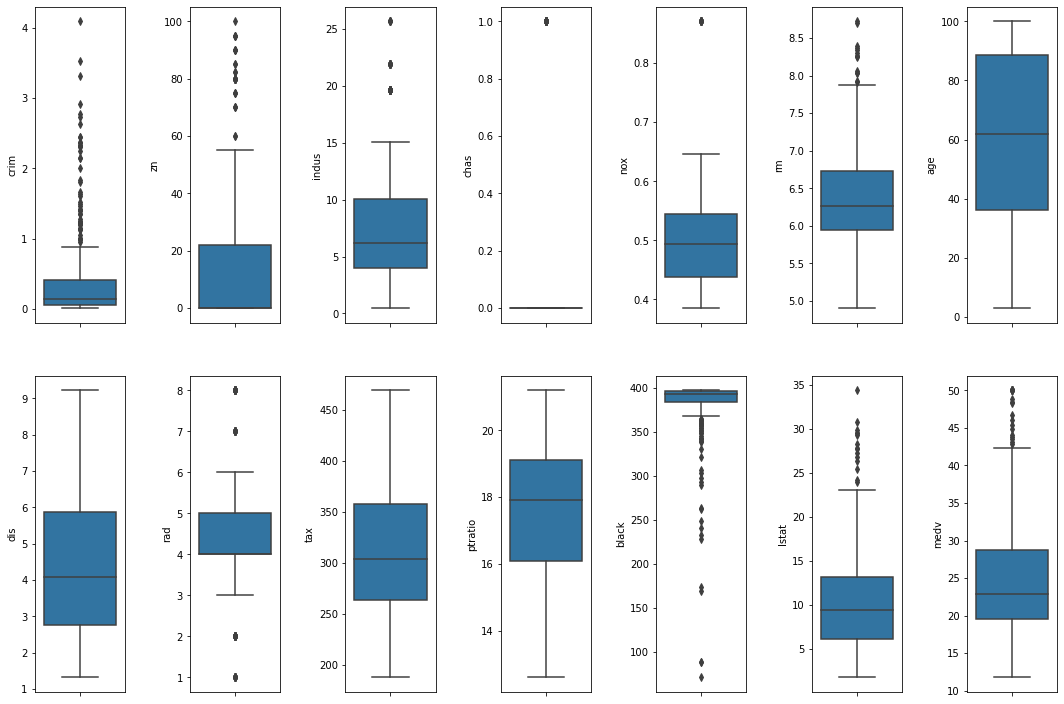

In [8]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(15, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=1.5, w_pad=2.5, h_pad=5.0)

# Creating distance plots

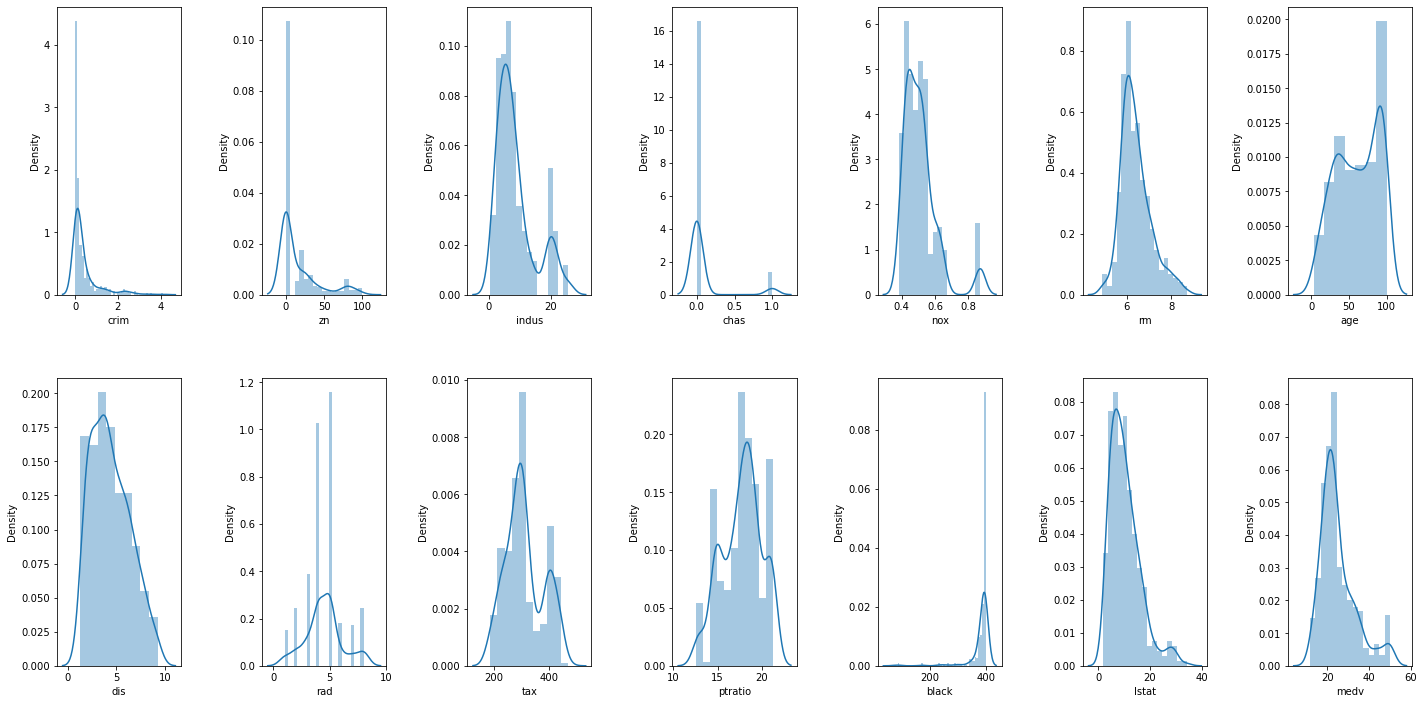

In [9]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=1.5, w_pad=2.5, h_pad=5.0)

# Creating Pair Plot

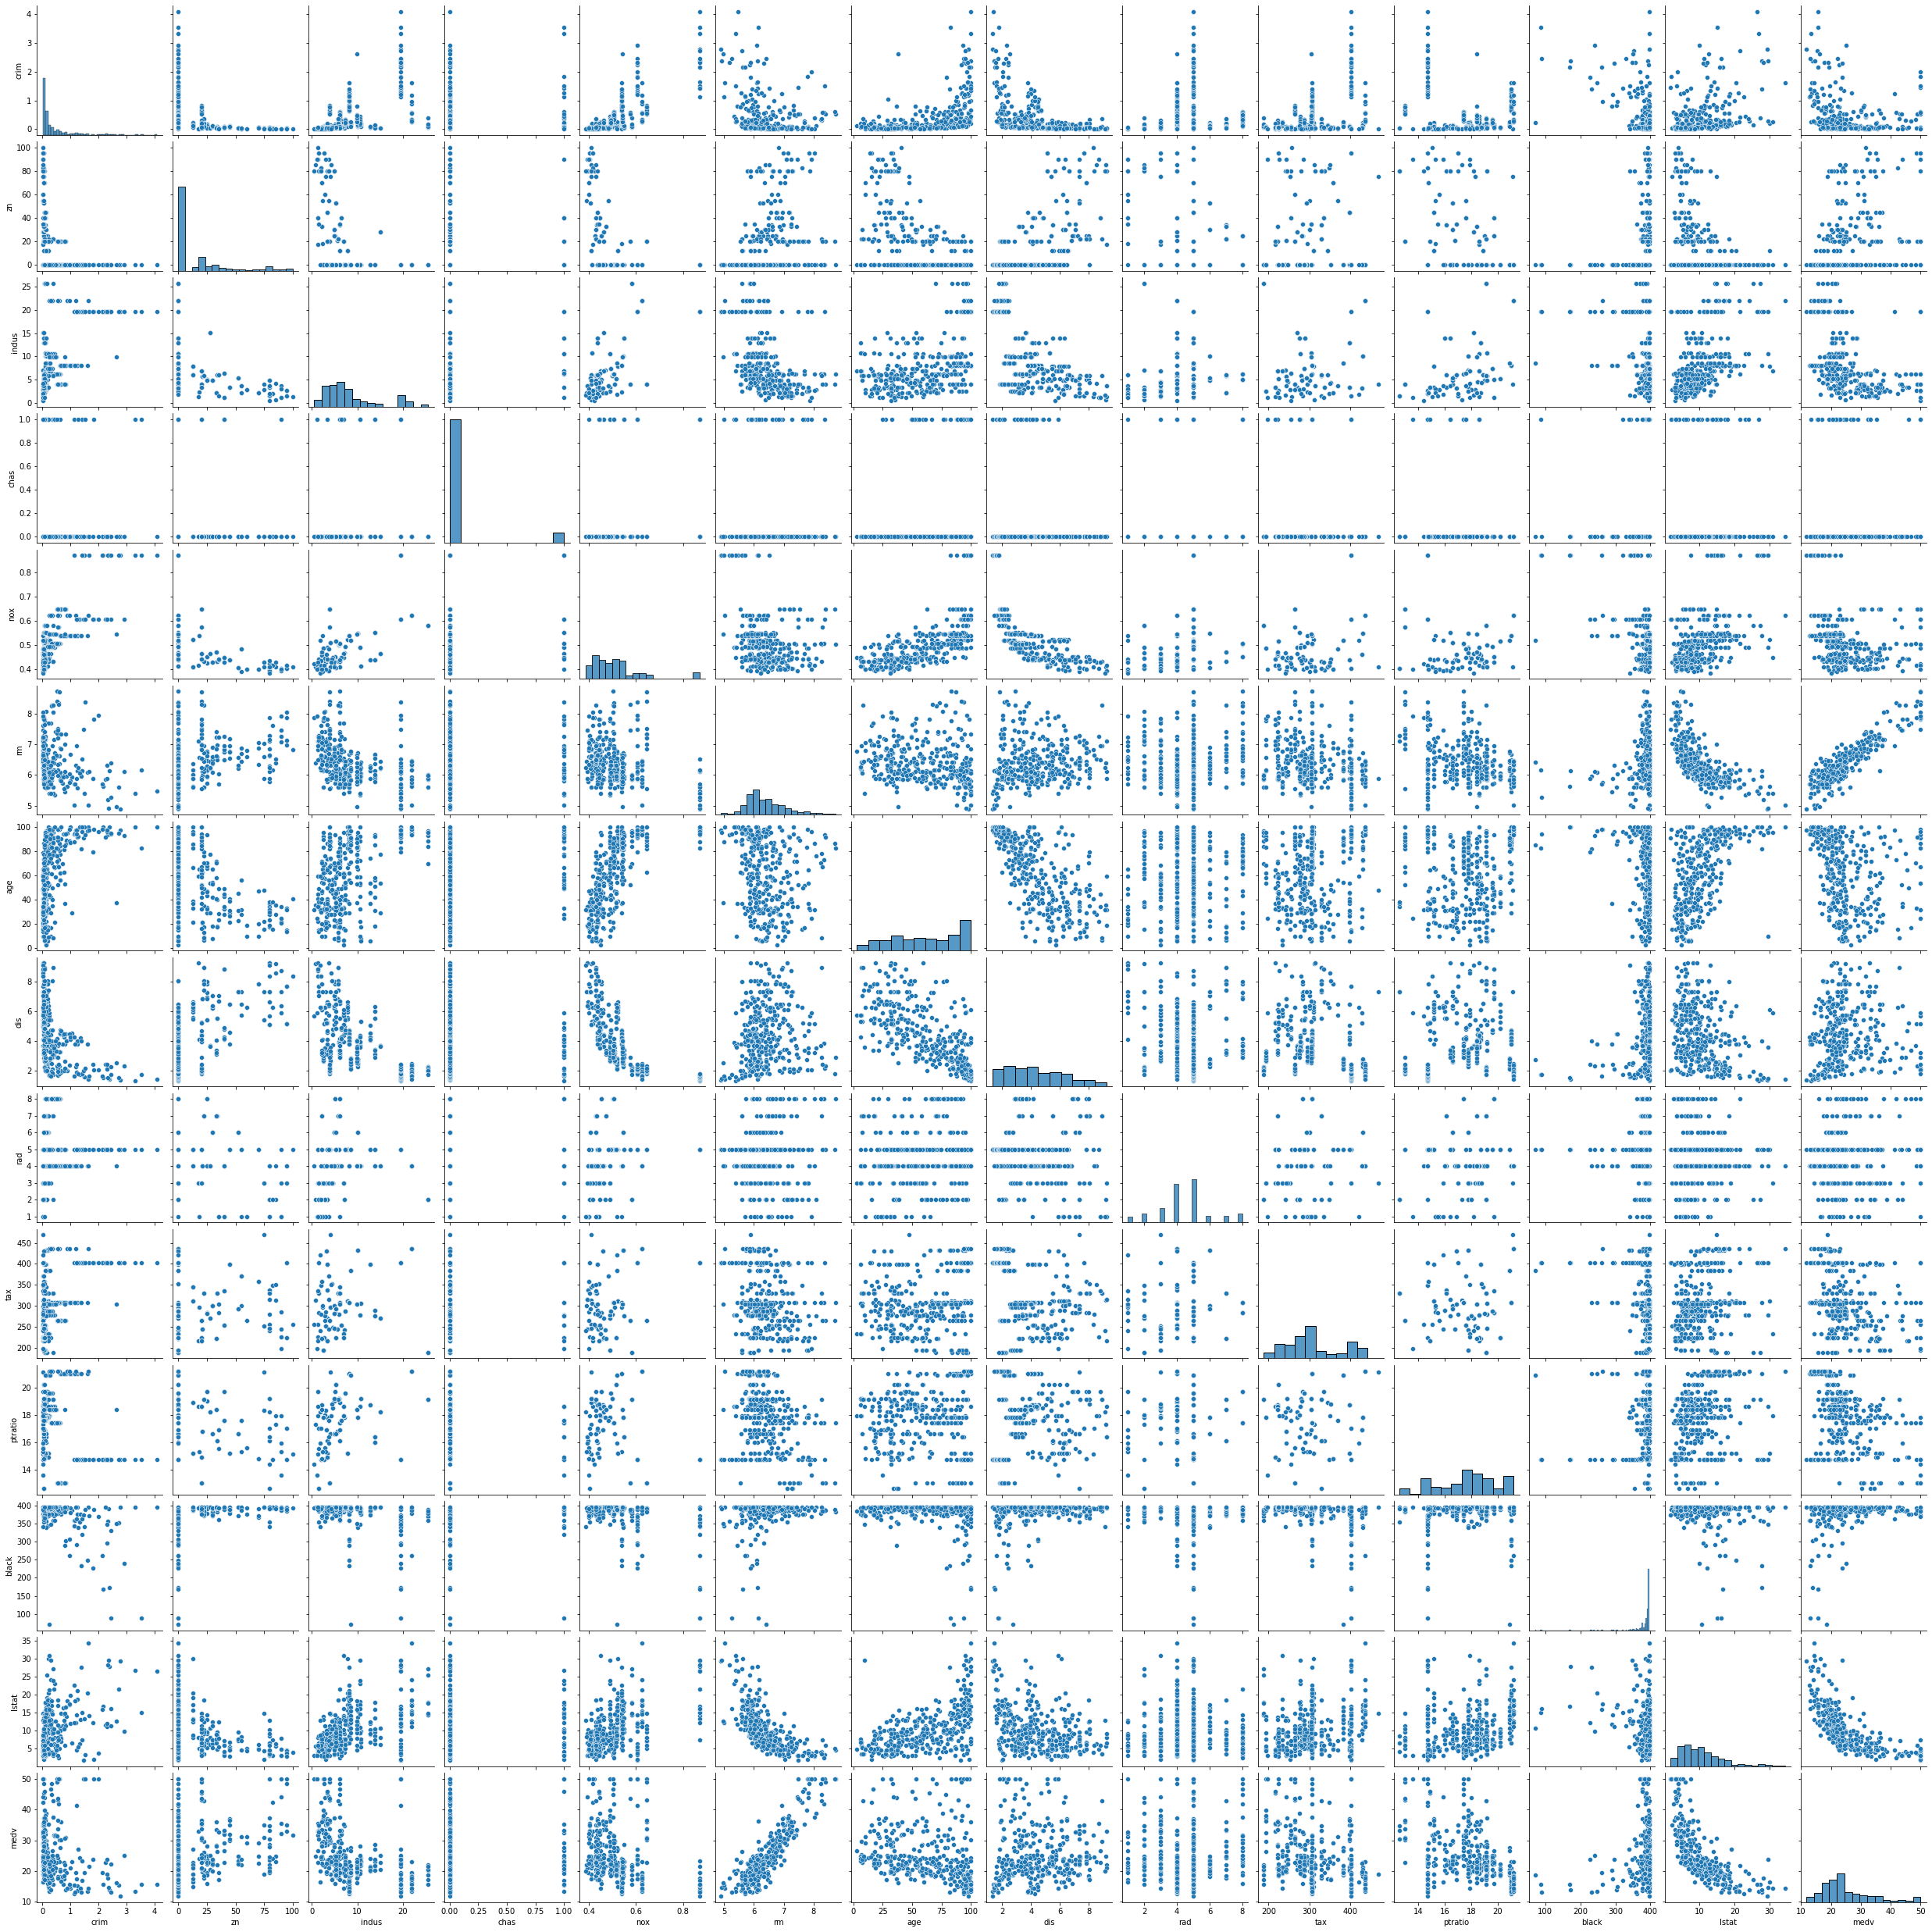

In [10]:
sns.pairplot(df)

# Heatmap

<AxesSubplot:>

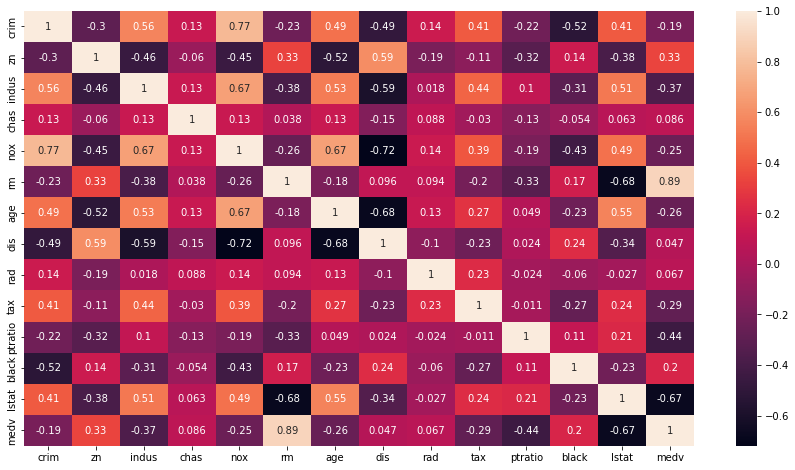

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)


# Training a Linear Regression Model:
Let’s now begin to train out the regression model. We will need to first split up our data into an X list that contains the features to train on, and a y list with the target variable, in this case medv.

In [61]:
X = df[['lstat', 'tax', 'ptratio','rm']]

y = df['medv']

In [62]:
from sklearn.linear_model import LinearRegression 

lm = LinearRegression() 

lm.fit(X,y)


LinearRegression()

In [63]:
print(lm.intercept_)
lm.score(X,y)


-16.74283107335781


0.8446730959030141

In [66]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [67]:
coeff_df

,Coefficient
lstat,-0.147365
tax,-0.013901
ptratio,-0.677144
rm,9.313687


# What does coefficient of data says:

# Predictions from our Linear Regression Model

In [58]:
predictions = lm.predict(X)  


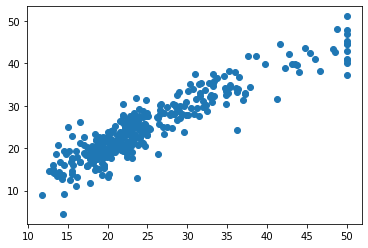

In [57]:
plt.scatter(y,predictions)


In the above scatter plot, we see data is in a line form, which means our model has done good predictions.

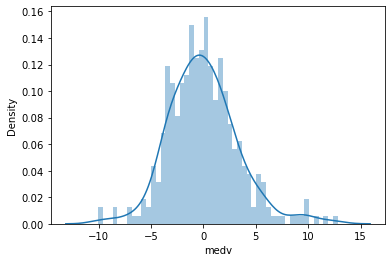

In [43]:
sns.distplot((y-predictions),bins=50); 

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand because it’s the average error.
MSE is more popular than MAE because MSE “punishes” larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE because RMSE is interpretable in the “y” units.
All of these are loss functions because we want to minimize them.

In [53]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y, predictions)) 
print('MSE:', metrics.mean_squared_error(y, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predictions)))

MAE: 2.5241473706411464
MSE: 11.090350282149474
RMSE: 3.3302177529629313


this evlauation is done in $1000 range

# Conclusion
We have created a Linear Regression Model which we help the real state agent for estimating the house price. 


# Difficulty faced
The most time required to solve a problem in this project was about how to fit model if we have seperate test and train data

# Details:
Name - Shreyash Patil
Github repo - https://github.com/Shreyash0505/Bio
email - shreyashpatil655@gmail.com